In [38]:
from Datos import Datos
from EstrategiaParticionado import *
from Clasificador import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

<h2>Declaración de funciones generales</h2>

In [39]:
def transformar_datos(dataset):
    
    # Utilizamos el diccionario para adaptar los datos
    for i in range(dataset.datos.shape[0]):
        for j in range(dataset.datos.shape[1]):
            if dataset.nominalAtributos[j]:
                dataset.datos[i, j] = dataset.diccionario[j][dataset.datos[i, j]]
                
    

def get_train_test(dataset, seed=None, p=0.2):
    vs = ValidacionSimple(p, 1)
    particiones = vs.creaParticiones(len(dataset.datos), seed=seed)

    datostrain = dataset.extraeDatos(particiones[0].indicesTrain)
    datostest = dataset.extraeDatos(particiones[0].indicesTest)
    datostrain = datostrain.astype('float32')
    datostest = datostest.astype('float32')
    return datostrain, datostest


<h1> Apartado 1 <\h1>

Por simplicidad, durante estas pruebas se va a utilizar validación simple.

Esquema de las ejecuciones:

1. Datos normalizados


    1.1. Dataset: wdbc
        1.1.1. Distancia: Euclidea
        1.1.2. Distancia: Manhattan
        1.1.3. Distancia: Mahalanobis
        
        
    1.2. Dataset: pima-indians-diabetes
        1.2.1. Distancia: Euclidea
        1.2.2. Distancia: Manhattan
        1.2.3. Distancia: Mahalanobis
        
2. Datos sin normalizar


    2.1. Dataset: wdbc
        2.1.1. Distancia: Euclidea
        2.1.2. Distancia: Manhattan
        2.1.3. Distancia: Mahalanobis
        
        
    2.2. Dataset: pima-indians-diabetes
        2.2.1. Distancia: Euclidea
        2.2.2. Distancia: Manhattan
        2.2.3. Distancia: Mahalanobis

<h2> Clasificador Vecinos Próximos <\h2>

In [40]:
k_values = np.arange(1, 50)

<h3>1. Datos normalizados</h3>

<h3>1.1 wdbc.data</h3>

In [41]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed=0
p=0.2

datostrain, datostest = get_train_test(dataset,seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

<h4>1.1.1. Distancia euclídea</h4>

In [42]:
k_precision_wdbc_euclidean_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_wdbc_euclidean_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.1.2 Distancia Manhattan</h4>

In [43]:
k_precision_wdbc_manhattan_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_wdbc_manhattan_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.1.3 Distancia Mahalanobis</h4>

In [44]:
k_precision_wdbc_mahalanobis_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_wdbc_mahalanobis_norm[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

Representamos las gráficas correspondientes a las tres distancias:

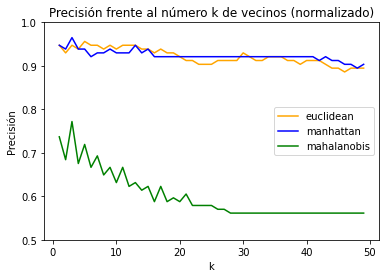

In [45]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

<h3>1.2 pima-indians-diabetes.data</h3>

In [46]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

<h4>1.2.1 Distancia euclídea</h4>

In [47]:
k_precision_pima_euclidean_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_pima_euclidean_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.2.2 Distancia Manhattan</h4>

In [48]:
k_precision_pima_manhattan_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_pima_manhattan_norm[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>1.2.3 Distancia Mahalanobis</h4>

In [49]:
k_precision_pima_mahalanobis_norm = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_pima_mahalanobis_norm[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

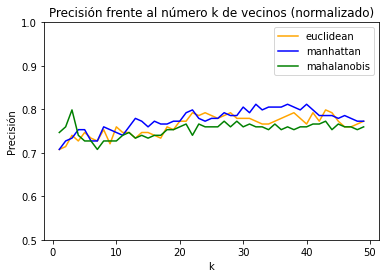

In [50]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

<h3>2. Datos sin normalizar</h3>

<h3>2.1 wdbc.data</h3>

In [51]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)

seed=0
p=0.2
datostrain, datostest = get_train_test(dataset,seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, norm=False)

<h4>2.1.1 Distancia euclídea</h4>

In [52]:
k_precision_wdbc_euclidean = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_wdbc_euclidean[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.1.2 Distancia Manhattan</h4>

In [53]:
k_precision_wdbc_manhattan = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_wdbc_manhattan[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.1.3 Distancia Mahalanobis</h4>

In [54]:
k_precision_wdbc_mahalanobis = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_wdbc_mahalanobis[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

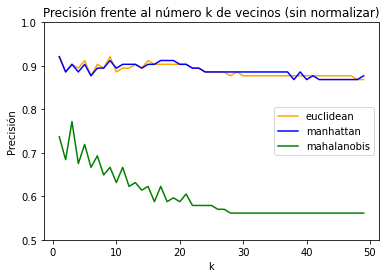

In [55]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

<h3>2.2 pima-indians-diabetes.data</h3>

In [56]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)

seed = 0
p = 0.2
datostrain, datostest = get_train_test(dataset, seed=seed, p=p)

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario, norm=False)

<h4>2.2.1 Distancia euclídea</h4>

In [57]:
k_precision_pima_euclidean = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="euclidea")
    k_precision_pima_euclidean[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.2.2 Distancia Manhattan</h4>

In [58]:
k_precision_pima_manhattan = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="manhattan")
    k_precision_pima_manhattan[cnt] = 1-cl.error(datostest, prediccion)
        
    cnt += 1

<h4>2.2.3 Distancia Mahalanobis</h4>

In [59]:
k_precision_pima_mahalanobis = np.zeros(len(k_values))

cnt = 0

for k in k_values:
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k, distancia="mahalanobis")
    k_precision_pima_mahalanobis[cnt] += 1-cl.error(datostest, prediccion)
        
    cnt += 1

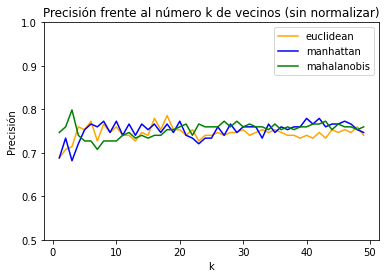

In [60]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

Un resumen de todas las gráficas

Para el dataset wdbc:

Comparación de las distancias para datos normalizados:

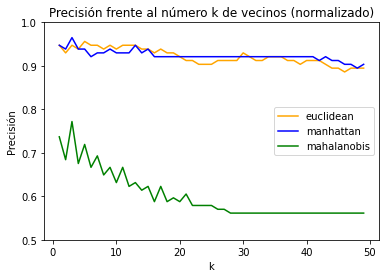

In [61]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Comparación de las distancias para datos no normalizados:

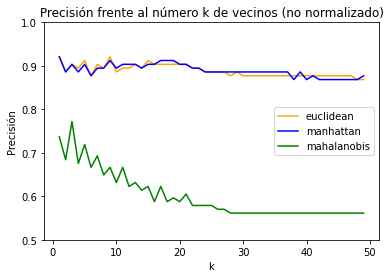

In [62]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (no normalizado)")
plt.show()

Comparación para cada una de las distancias entre la versión normalizada y sin normalizar:

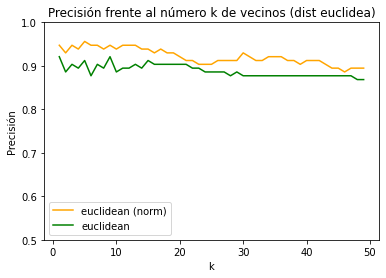

In [63]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='euclidean (norm)')
plt.plot(k_values, k_precision_wdbc_euclidean, color='g', label='euclidean')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

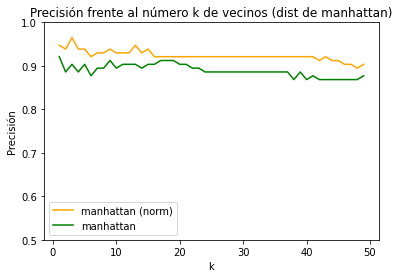

In [64]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_manhattan_norm, color='orange', label='manhattan (norm)')
plt.plot(k_values, k_precision_wdbc_manhattan, color='g', label='manhattan')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de manhattan)")
plt.show()

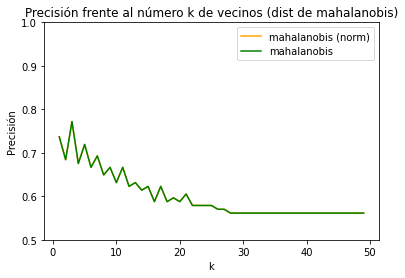

In [65]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm, color='orange', label='mahalanobis (norm)')
plt.plot(k_values, k_precision_wdbc_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de mahalanobis)")
plt.show()

Para el dataset pima-indians-diabetes:

Comparación de las distancias para datos normalizados:

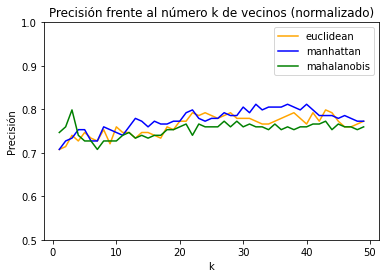

In [66]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_norm, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_norm, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

Comparación de las distancias para datos no noramlizados:

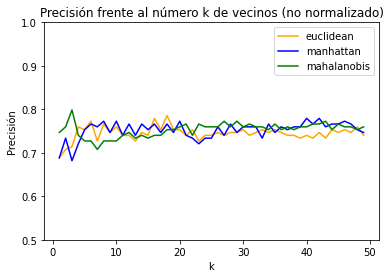

In [67]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (no normalizado)")
plt.show()

Comparación para cada una de las distancias entre la versión normalizada y sin normalizar:

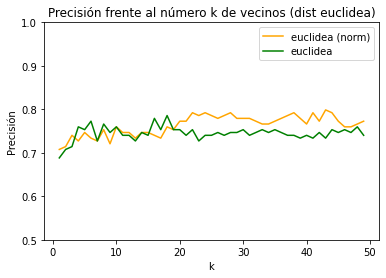

In [68]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='euclidea (norm)')
plt.plot(k_values, k_precision_pima_euclidean, color='g', label='euclidea')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

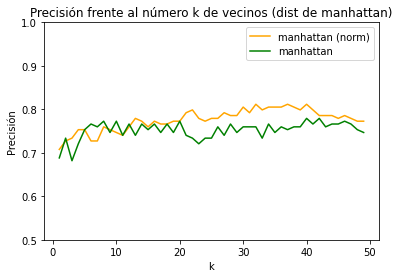

In [69]:
plt.figure()
plt.plot(k_values, k_precision_pima_manhattan_norm, color='orange', label='manhattan (norm)')
plt.plot(k_values, k_precision_pima_manhattan, color='g', label='manhattan')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de manhattan)")
plt.show()

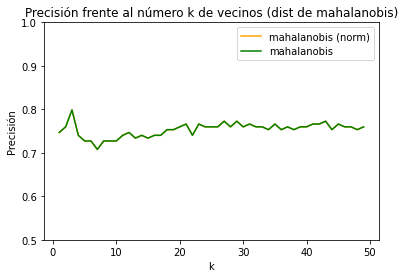

In [70]:
plt.figure()
plt.plot(k_values, k_precision_pima_mahalanobis_norm, color='orange', label='mahalanobis (norm)')
plt.plot(k_values, k_precision_pima_mahalanobis, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist de mahalanobis)")
plt.show()

<h1> Apartado 2 <\h1>

<h2>Clasificador de RegresionLogistica</h2>

In [24]:
n_epocas_values=np.arange(1000, 10000, 2000)
alpha_values = np.arange(0.001, 0.011, 0.001)

<h3>wdbc.data</h3>

In [25]:
dataset = Datos('wdbc.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

epocas_precision_wdbc = np.empty((n_epocas_values.shape[0], alpha_values.shape[0]) )

i = 0

for n_epocas in n_epocas_values:
    j = 0
    for alpha in alpha_values:
        cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
        cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
        prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

        epocas_precision_wdbc[i][j] = 1-cl.error(datostest, prediccion)
        j += 1
        
    i += 1

C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:308: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


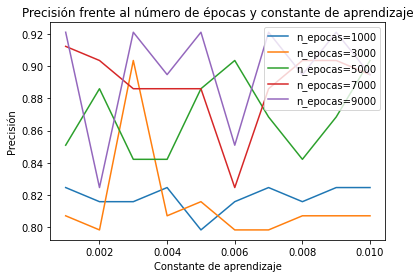

In [28]:
plt.figure()
for i in range(epocas_precision_wdbc.shape[0]):
    plt.plot(alpha_values, epocas_precision_wdbc[i], label="n_epocas="+str(n_epocas_values[i]))
plt.xlabel("Constante de aprendizaje")
plt.ylabel("Precisión")
plt.title("Precisión frente al número de épocas y constante de aprendizaje")
plt.legend(loc = "upper right")
plt.show()

<h3>pima-indians-diabetes.data</h3>

In [58]:
dataset = Datos('pima-indians-diabetes.data')
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed, p)

epocas_precision_pima = np.empty(len(n_epocas_values))

cnt = 0

for n_epocas in n_epocas_values:
    cl = ClasificadorRegresionLogistica(alpha=0.01, n_epocas=n_epocas)
    cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)
    prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)
    
    epocas_precision_pima[cnt] = 1-cl.error(datostest, prediccion)
    cnt += 1

C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:297: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [59]:
print(epocas_precision_pima)

[0.72727273 0.75324675 0.72727273 0.74025974 0.72727273 0.7012987
 0.67532468 0.72727273 0.68831169 0.75974026]


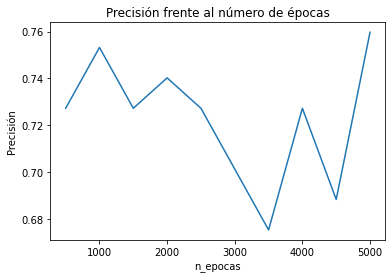

In [60]:
plt.figure()
plt.plot(n_epocas_values, epocas_precision_pima)
plt.xlabel("n_epocas")
plt.ylabel("Precisión")
plt.title("Precisión frente al número de épocas")
plt.show()

<h1> Apartado 3 <\h1>

<h2>Comparación con Scikit-Learn</h2>

<h2> Clasificador de Vecinos Próximos <\h2>

De forma análoga a los dos apartados anteriores realizaremso varias pruebas siguiendo el siguiente esquema:
1. Datos normalizados


    1.1. Dataset: wdbc
        1.1.1. Distancia: Euclidea
        1.1.2. Distancia: Manhattan
        1.1.3. Distancia: Mahalanobis
        
        
    1.2. Dataset: pima-indians-diabetes
        1.2.1. Distancia: Euclidea
        1.2.2. Distancia: Manhattan
        1.2.3. Distancia: Mahalanobis
        
2. Datos sin normalizar


    2.1. Dataset: wdbc
        2.1.1. Distancia: Euclidea
        2.1.2. Distancia: Manhattan
        2.1.3. Distancia: Mahalanobis
        
        
    2.2. Dataset: pima-indians-diabetes
        2.2.1. Distancia: Euclidea
        2.2.2. Distancia: Manhattan
        2.2.3. Distancia: Mahalanobis

<h3> 1. Datos normalizados <\h3>

Por defecto el clasificador KNeighborsClassifier no normaliza los datos pero scikit proporciona un modulo de preprocessing, el cual utilizaremos para normalizar los datos. 

<h4> 1.1 Dataset: wdbc <\h4>

In [71]:
archivo = 'wdbc.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

Ejecutamos como prueba el algoritmo de clasificación de vecinos próximos primero con n_vecinos = 5 y distancia euclidea:

In [72]:
clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='brute', metric='euclidean', metric_params=None, n_jobs=None).fit(X_train_norm, y_train)
print(clf.score(X_test_norm, y_test))

0.956140350877193


Hacemos ahora el mismo experimento que en el apartado anterior con este conjunto de datos mostrando la gráfica comparativa de las distancias al final.

<h4> 1.1.1 Distancia: Euclídea <\h4>

In [73]:
k_precision_wdbc_euclidean_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train_norm, y_train)
    k_precision_wdbc_euclidean_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.1.2 Distancia: Manhattan <\h4>

In [74]:
k_precision_wdbc_manhattan_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train_norm, y_train)
    k_precision_wdbc_manhattan_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.1.3 Distancia: Mahalanobis <\h4>

In [75]:
k_precision_wdbc_mahalanobis_norm_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train_norm, y_train)
    k_precision_wdbc_mahalanobis_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

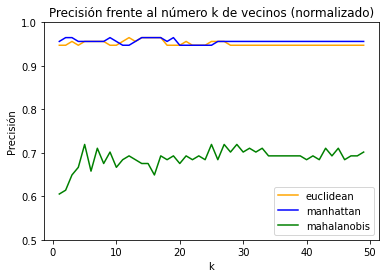

In [76]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_norm_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

<h4> 1.2 Dataset: pima-indians-diabetes <\h4>

In [77]:
archivo = 'pima-indians-diabetes.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

<h4> 1.2.1 Distancia: Euclídea <\h4>

In [78]:
k_precision_pima_euclidean_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train_norm, y_train)
    k_precision_pima_euclidean_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.2.2 Distancia: Manhattan <\h4>

In [79]:
k_precision_pima_manhattan_norm_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train_norm, y_train)
    k_precision_pima_manhattan_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

<h4> 1.2.3 Distancia: Mahalanobis <\h4>

In [80]:
k_precision_pima_mahalanobis_norm_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train_norm, y_train)
    k_precision_pima_mahalanobis_norm_scikit[cnt] = clf.score(X_test_norm, y_test)
    cnt += 1

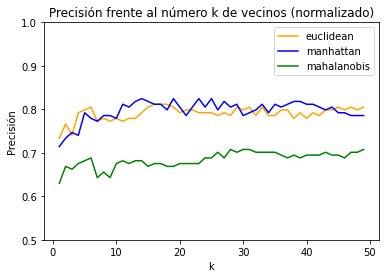

In [81]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_norm_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_norm_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (normalizado)")
plt.show()

<h3> 2. Datos sin normalizar <\h3>

<h4> 2.1 Dataset: wdbc <\h4>

In [82]:
archivo = 'wdbc.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

<h4> 2.1.1 Distancia: Euclídea <\h4>

In [83]:
k_precision_wdbc_euclidean_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train, y_train)
    k_precision_wdbc_euclidean_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.2 Distancia: Manhattan <\h4>

In [84]:
k_precision_wdbc_manhattan_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train, y_train)
    k_precision_wdbc_manhattan_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.3 Distancia: Mahalanobis <\h4>

In [85]:
k_precision_wdbc_mahalanobis_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train, y_train)
    k_precision_wdbc_mahalanobis_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

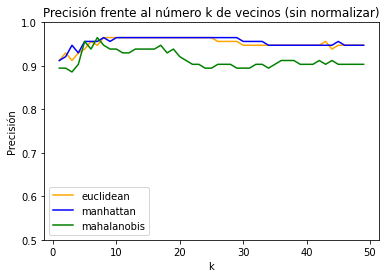

In [86]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_wdbc_manhattan_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_wdbc_mahalanobis_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

<h4> 2.2 Dataset: pima-indians-diabetes <\h4>

In [87]:
archivo = 'pima-indians-diabetes.data'
p = 0.2
seed = 0

dataset = Datos(archivo)

transformar_datos(dataset)
            
X = dataset.datos[:, :-1]
y = dataset.datos[:, -1]

X = X.astype('float32')
y = y.astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=p, random_state=seed)

<h4> 2.1.1 Distancia: Euclídea <\h4>

In [88]:
k_precision_pima_euclidean_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='euclidean').fit(X_train, y_train)
    k_precision_pima_euclidean_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.2 Distancia: Manhattan <\h4>

In [89]:
k_precision_pima_manhattan_scikit = np.zeros(len(k_values))
cnt = 0
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='manhattan').fit(X_train, y_train)
    k_precision_pima_manhattan_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

<h4> 2.1.3 Distancia: Mahalanobis <\h4>

In [90]:
k_precision_pima_mahalanobis_scikit = np.zeros(len(k_values))
cnt = 0
VI = np.linalg.inv(np.cov(X_train_norm).T)
for k in k_values:
    clf = KNeighborsClassifier(n_neighbors=k, weights='uniform', algorithm='brute', metric='mahalanobis', metric_params={'VI': VI}).fit(X_train, y_train)
    k_precision_pima_mahalanobis_scikit[cnt] = clf.score(X_test, y_test)
    cnt += 1

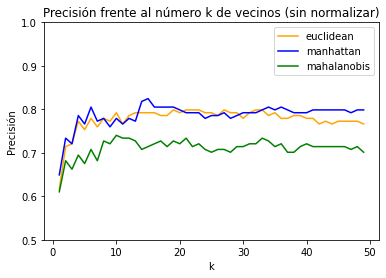

In [91]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_scikit, color='orange', label='euclidean')
plt.plot(k_values, k_precision_pima_manhattan_scikit, color='b', label='manhattan')
plt.plot(k_values, k_precision_pima_mahalanobis_scikit, color='g', label='mahalanobis')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (sin normalizar)")
plt.show()

Inluimos ahora las comparaciones entre versiones normalizadas y sin normalizar para cada distancia

Para dataset wdcb:

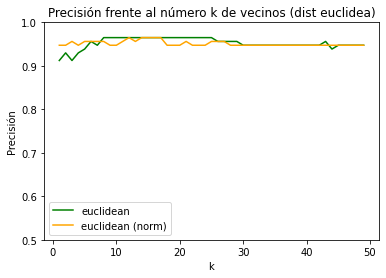

In [92]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_scikit, color='green', label='euclidean')
plt.plot(k_values, k_precision_wdbc_euclidean_norm_scikit, color='orange', label='euclidean (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

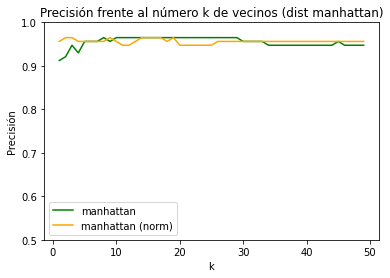

In [93]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_manhattan_scikit, color='green', label='manhattan')
plt.plot(k_values, k_precision_wdbc_manhattan_norm_scikit, color='orange', label='manhattan (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist manhattan)")
plt.show()

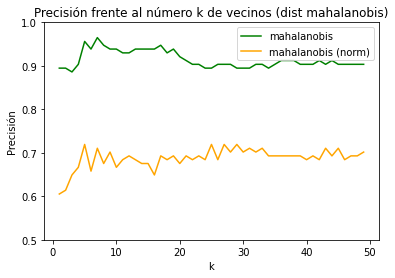

In [94]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_mahalanobis_scikit, color='green', label='mahalanobis')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm_scikit, color='orange', label='mahalanobis (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist mahalanobis)")
plt.show()

Para dataset pima-indians-diabetes:

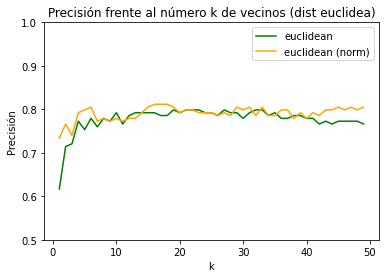

In [95]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_scikit, color='green', label='euclidean')
plt.plot(k_values, k_precision_pima_euclidean_norm_scikit, color='orange', label='euclidean (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist euclidea)")
plt.show()

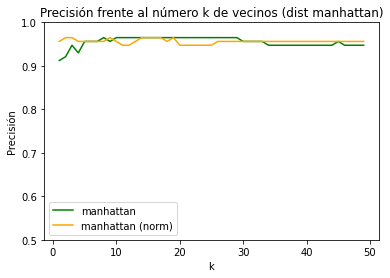

In [96]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_manhattan_scikit, color='green', label='manhattan')
plt.plot(k_values, k_precision_wdbc_manhattan_norm_scikit, color='orange', label='manhattan (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist manhattan)")
plt.show()

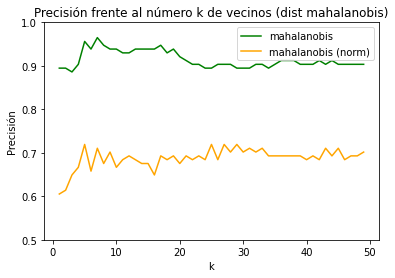

In [97]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_mahalanobis_scikit, color='green', label='mahalanobis')
plt.plot(k_values, k_precision_wdbc_mahalanobis_norm_scikit, color='orange', label='mahalanobis (norm)')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos (dist mahalanobis)")
plt.show()

Comparación de resultados entre nuestra implementación y el algoritmo de scikit learn con distancia euclidea y conjunto de datos wdbc:


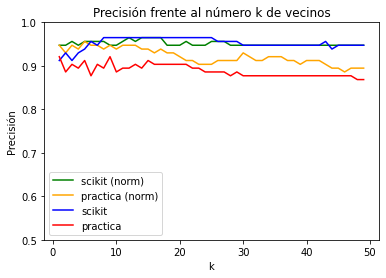

In [98]:
plt.figure()
plt.plot(k_values, k_precision_wdbc_euclidean_norm_scikit, color='green', label='scikit (norm)')
plt.plot(k_values, k_precision_wdbc_euclidean_norm, color='orange', label='practica (norm)')
plt.plot(k_values, k_precision_wdbc_euclidean_scikit, color='blue', label='scikit')
plt.plot(k_values, k_precision_wdbc_euclidean, color='red', label='practica')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos")
plt.show()

Comparación de resultados entre nuestra implementación y el algoritmo de scikit learn con distancia euclidea y conjunto de datos pima-indians-diabetes:

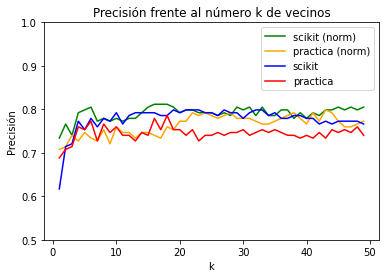

In [99]:
plt.figure()
plt.plot(k_values, k_precision_pima_euclidean_norm_scikit, color='green', label='scikit (norm)')
plt.plot(k_values, k_precision_pima_euclidean_norm, color='orange', label='practica (norm)')
plt.plot(k_values, k_precision_pima_euclidean_scikit, color='blue', label='scikit')
plt.plot(k_values, k_precision_pima_euclidean, color='red', label='practica')
plt.legend()
plt.ylim(0.5, 1)
plt.xlabel("k")
plt.ylabel("Precisión")
plt.title("Precisión frente al número k de vecinos")
plt.show()

<h2> Clasificador de Regresión Logistica <\h2>

<h2>Evaluación de hipótesis mediante Análisis ROC</h2>

In [26]:
p = 0.2
seed = 0

def get_ROC_data(conf_data, clases, ocurrencias_clases):
    
    matriz_conf = np.zeros((2, 2))
    matriz_conf[0][0] = ocurrencias_clases[clases[1]]
    matriz_conf[0][1] = ocurrencias_clases[clases[0]]
    tpr = np.empty(len(datostest))
    fpr = np.empty(len(datostest))

    for i in range(len(conf_data)):
        if conf_data[i][1] == clases[0]: # Dato negativo
            matriz_conf[1][1] += 1 #TN
            matriz_conf[0][1] -= 1 #FP

        else: # Dato positivo
            matriz_conf[1][0] += 1 #FN
            matriz_conf[0][0] -= 1 #TP


        tpr[i] = matriz_conf[0][0]/(matriz_conf[0][0]+matriz_conf[1][0])

        fpr[i] = matriz_conf[0][1]/(matriz_conf[0][1]+matriz_conf[1][1])
    
    return tpr, fpr

def get_matriz_conf(datostest, prediccion, clases):
    matriz_conf = np.zeros((2, 2))
    
    for i in range(len(datostest)):
        if prediccion[i] == clases[0]:
            if datostest[i][-1] == clases[0]: # TN
                matriz_conf[1][1] += 1
            else: # FN 
                matriz_conf[1][0] += 1
        else:
            if datostest[i][-1] == clases[0]: # FP
                matriz_conf[0][1] += 1
            else: # TP
                matriz_conf[0][0] += 1
    
    return matriz_conf

<h3>Naive-Bayes</h3>

<h4>wdbc.data</h4>

In [27]:
archivo = 'wdbc.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [28]:
tpr_wdbc_bayes, fpr_wdbc_bayes = get_ROC_data(conf_data, clases, counts)
matriz_conf_wdbc_bayes = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [29]:
print("Matriz de confusión wdbc.data Naive-Bayes")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_wdbc_bayes[0][0], " \t\t ", matriz_conf_wdbc_bayes[0][1])
print("\t Negativo ", matriz_conf_wdbc_bayes[1][0], " \t\t ", matriz_conf_wdbc_bayes[1][1])

Matriz de confusión wdbc.data Naive-Bayes

				Real
		  Positivo		Negativo
Estimado Positivo  42.0  		  7.0
	 Negativo  9.0  		  56.0


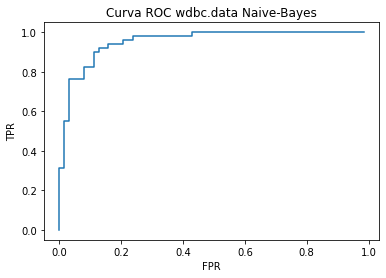

In [30]:
plt.figure()
plt.plot(fpr_wdbc_bayes, tpr_wdbc_bayes)
plt.title("Curva ROC wdbc.data Naive-Bayes")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h4>pima-indians-diabetes.data</h4>

In [31]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorNaiveBayes()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)

conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i][1], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])


In [32]:
tpr_pima_bayes, fpr_pima_bayes = get_ROC_data(conf_data, clases, counts)
matriz_conf_pima_bayes = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [33]:
print("Matriz de confusión pima-indians-diabetes.data Naive-Bayes")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_pima_bayes[0][0], " \t\t ", matriz_conf_pima_bayes[0][1])
print("\t Negativo ", matriz_conf_pima_bayes[1][0], " \t\t ", matriz_conf_pima_bayes[1][1])

Matriz de confusión pima-indians-diabetes.data Naive-Bayes

				Real
		  Positivo		Negativo
Estimado Positivo  27.0  		  15.0
	 Negativo  24.0  		  88.0


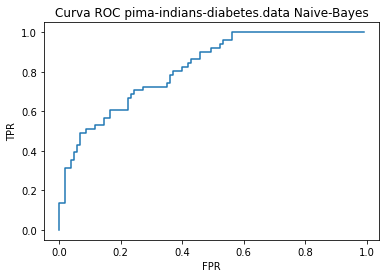

In [34]:
plt.figure()
plt.plot(fpr_pima_bayes, tpr_pima_bayes)
plt.title("Curva ROC pima-indians-diabetes.data Naive-Bayes")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h3>Regresión Logística</h3>

In [35]:
alpha = 0.001
n_epocas = 10000

<h4>wdbc.data</h4>

In [36]:
archivo = 'wdbc.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)


C:\Users\admitin\Desktop\Universidad\FAA\practica2\Clasificador.py:319: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-x))


In [37]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.sigmoid(np.inner(np.concatenate(([1], datostest[i][:-1])), cl.w)), datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [38]:
tpr_wdbc_logistica, fpr_wdbc_logistica = get_ROC_data(conf_data, clases, counts)
matriz_conf_wdbc_logistica = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [39]:
print("Matriz de confusión wdbc.data Regresión Logística")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_wdbc_logistica[0][0], " \t\t ", matriz_conf_wdbc_logistica[0][1])
print("\t Negativo ", matriz_conf_wdbc_logistica[1][0], " \t\t ", matriz_conf_wdbc_logistica[1][1])

Matriz de confusión wdbc.data Regresión Logística

				Real
		  Positivo		Negativo
Estimado Positivo  46.0  		  4.0
	 Negativo  5.0  		  59.0


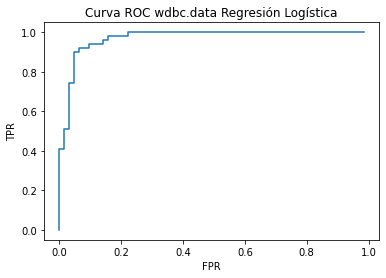

In [40]:
plt.figure()
plt.plot(fpr_wdbc_logistica, tpr_wdbc_logistica)
plt.title("Curva ROC wdbc.data Regresión Logística")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h4>pima-indians-diabetes.data</h4>

In [41]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorRegresionLogistica(alpha=alpha, n_epocas=n_epocas)
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario)


In [42]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.sigmoid(np.inner(np.concatenate(([1], datostest[i][:-1])), cl.w)), datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [43]:
tpr_pima_logistica, fpr_pima_logistica = get_ROC_data(conf_data, clases, counts)
matriz_conf_pima_logistica = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [44]:
print("Matriz de confusión pima-indians-diabetes.data Regresión Logística")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_pima_logistica[0][0], " \t\t ", matriz_conf_pima_logistica[0][1])
print("\t Negativo ", matriz_conf_pima_logistica[1][0], " \t\t ", matriz_conf_pima_logistica[1][1])

Matriz de confusión pima-indians-diabetes.data Regresión Logística

				Real
		  Positivo		Negativo
Estimado Positivo  25.0  		  13.0
	 Negativo  26.0  		  90.0


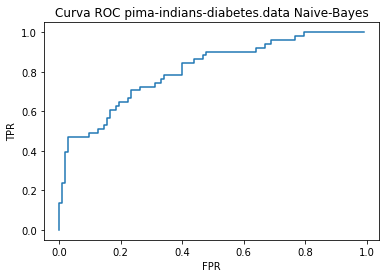

In [45]:
plt.figure()
plt.plot(fpr_pima_logistica, tpr_pima_logistica)
plt.title("Curva ROC pima-indians-diabetes.data Naive-Bayes")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h3>Vecinos Próximos</h3>

In [46]:
k = 10

<h4>wdbc.data</h4>

In [47]:
archivo = 'wdbc.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k)


In [48]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [49]:
tpr_wdbc_vecinos, fpr_wdbc_vecinos = get_ROC_data(conf_data, clases, counts)
matriz_conf_wdbc_vecinos = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [50]:
print("Matriz de confusión wdbc.data Vecinos Próximos")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_wdbc_vecinos[0][0], " \t\t ", matriz_conf_wdbc_vecinos[0][1])
print("\t Negativo ", matriz_conf_wdbc_vecinos[1][0], " \t\t ", matriz_conf_wdbc_vecinos[1][1])

Matriz de confusión wdbc.data Vecinos Próximos

				Real
		  Positivo		Negativo
Estimado Positivo  46.0  		  0.0
	 Negativo  5.0  		  63.0


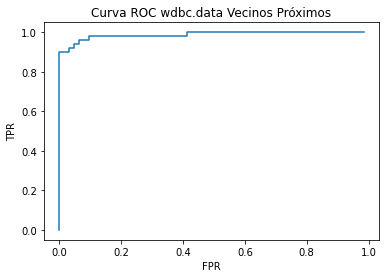

In [51]:
plt.figure()
plt.plot(fpr_wdbc_vecinos, tpr_wdbc_vecinos)
plt.title("Curva ROC wdbc.data Vecinos Próximos")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h4>pima-indians-diabetes.data</h4>

In [52]:
archivo = 'pima-indians-diabetes.data'

dataset = Datos(archivo)
transformar_datos(dataset)
datostrain, datostest = get_train_test(dataset, seed=seed)

clases, counts = np.unique(datostest[:, -1], return_counts=True)
clases = list(map(int, sorted(clases)))

cl = ClasificadorVecinosProximos()
cl.entrenamiento(datostrain, dataset.nominalAtributos, dataset.diccionario)

prediccion = cl.clasifica(datostest, dataset.nominalAtributos, dataset.diccionario, k=k)


In [53]:
conf_data = np.empty((len(prediccion), 2))
for i in range(conf_data.shape[0]):
    conf_data[i] = [cl.probabilidades[i], datostest[i][-1]]

conf_data = sorted(conf_data, key=lambda x: x[0])

In [54]:
tpr_pima_vecinos, fpr_pima_vecinos = get_ROC_data(conf_data, clases, counts)
matriz_conf_pima_vecinos = get_matriz_conf(datostest, prediccion, clases)

Matriz de confusión:

In [55]:
print("Matriz de confusión pima-indians-diabetes.data Vecinos Próximos")
print()
print("\t\t\t\tReal")
print("\t\t  Positivo\t\tNegativo")
print("Estimado Positivo ", matriz_conf_pima_vecinos[0][0], " \t\t ", matriz_conf_pima_vecinos[0][1])
print("\t Negativo ", matriz_conf_pima_vecinos[1][0], " \t\t ", matriz_conf_pima_vecinos[1][1])

Matriz de confusión pima-indians-diabetes.data Vecinos Próximos

				Real
		  Positivo		Negativo
Estimado Positivo  51.0  		  0.0
	 Negativo  0.0  		  103.0


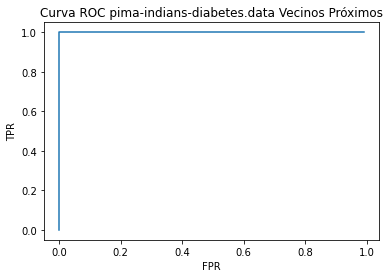

In [56]:
plt.figure()
plt.plot(fpr_pima_vecinos, tpr_pima_vecinos)
plt.title("Curva ROC pima-indians-diabetes.data Vecinos Próximos")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

<h3>Comparación de las curvas por datasets</h3>

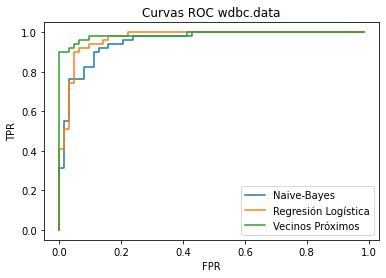

In [63]:
plt.figure()
plt.plot(fpr_wdbc_bayes, tpr_wdbc_bayes, label="Naive-Bayes")
plt.plot(fpr_wdbc_logistica, tpr_wdbc_logistica, label="Regresión Logística")
plt.plot(fpr_wdbc_vecinos, tpr_wdbc_vecinos, label="Vecinos Próximos")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC wdbc.data")
plt.show()

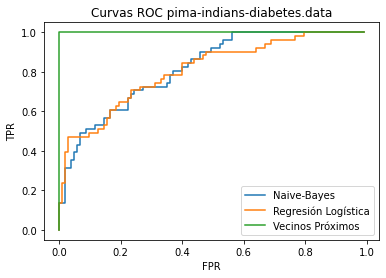

In [62]:
plt.figure()
plt.plot(fpr_pima_bayes, tpr_pima_bayes, label="Naive-Bayes")
plt.plot(fpr_pima_logistica, tpr_pima_logistica, label="Regresión Logística")
plt.plot(fpr_pima_vecinos, tpr_pima_vecinos, label="Vecinos Próximos")
plt.legend(loc="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Curvas ROC pima-indians-diabetes.data")
plt.show()

<h3>AUC</h3>

A continuación, vamos a calcular las áreas bajo las curvas ROC (AUC) para determinar la calidad de cada método:

In [57]:
def AUC(fpr, tpr):

    auc = 0
    for i in range(len(tpr)-1):
        auc += (fpr[i]-fpr[i+1])*tpr[i]
    
    auc += fpr[-1]*tpr[-1]
        
    return auc

In [58]:
auc_wdbc_bayes = AUC(fpr_wdbc_bayes, tpr_wdbc_bayes)
auc_pima_bayes = AUC(fpr_pima_bayes, tpr_pima_bayes)

auc_wdbc_logistica = AUC(fpr_wdbc_logistica, tpr_wdbc_logistica)
auc_pima_logistica = AUC(fpr_pima_logistica, tpr_pima_logistica)

auc_wdbc_vecinos = AUC(fpr_wdbc_vecinos, tpr_wdbc_vecinos)
auc_pima_vecinos = AUC(fpr_pima_vecinos, tpr_pima_vecinos)

In [59]:
print("AUC wdbc.data Naive-Bayes:", auc_wdbc_bayes)
print("AUC wdbc.data Regresión Logística:", auc_wdbc_logistica)
print("AUC wdbc.data Vecinos Próximos:", auc_wdbc_vecinos)
print()
print("AUC pima-indians-diabetes.data Naive-Bayes:", auc_pima_bayes)
print("AUC pima-indians-diabetes.data Regresión Logística:", auc_pima_logistica)
print("AUC pima-indians-diabetes.data Vecinos Próximos:", auc_pima_vecinos)


AUC wdbc.data Naive-Bayes: 0.9374416433239959
AUC wdbc.data Regresión Logística: 0.954248366013071
AUC wdbc.data Vecinos Próximos: 0.9713663243075008

AUC pima-indians-diabetes.data Naive-Bayes: 0.8102036931277368
AUC pima-indians-diabetes.data Regresión Logística: 0.7985912811726631
AUC pima-indians-diabetes.data Vecinos Próximos: 0.9902912621359221


Para ambos datasets se obtiene que Vecinos Próximos da mejores resultados.